# 230131 Data visualization


In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# https://insights.stackoverflow.com/survey
# 스택오버플로우 자료를 가져올거임 
# 생각보다 None 값이 많다 

#ipynb가 존재하는 디렉토리에 data 디렉토리를 만들어 그 안에 데이터를 넣어놓았다 
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col='ResponseId')
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col="qname")["question"] #Series만 가지고 있을거임 question만 인덱싱 
# 스키마라는 것은 데이터에 대한 요약 정보임 (column에 대한 어떤 질문이었는 지를..)


In [56]:
selected_columns = [
    #인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [57]:
def count_nan(series:pd.Series):
    return len(series) - series.count()

survey_df = survey_raw_df[selected_columns].copy()# copy 해서 raw df를 건드리지 않고 별도의 데이터프레임을 만듦



In [58]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts()

font_list = fm.findSystemFonts(fontpaths=None)
font_list
mpl.rcParams['font.family']

['NanumSquare']

In [79]:
plt.style.use("default")

path = '/Users/minholee/Library/Fonts/NanumSquareR.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

NanumSquare


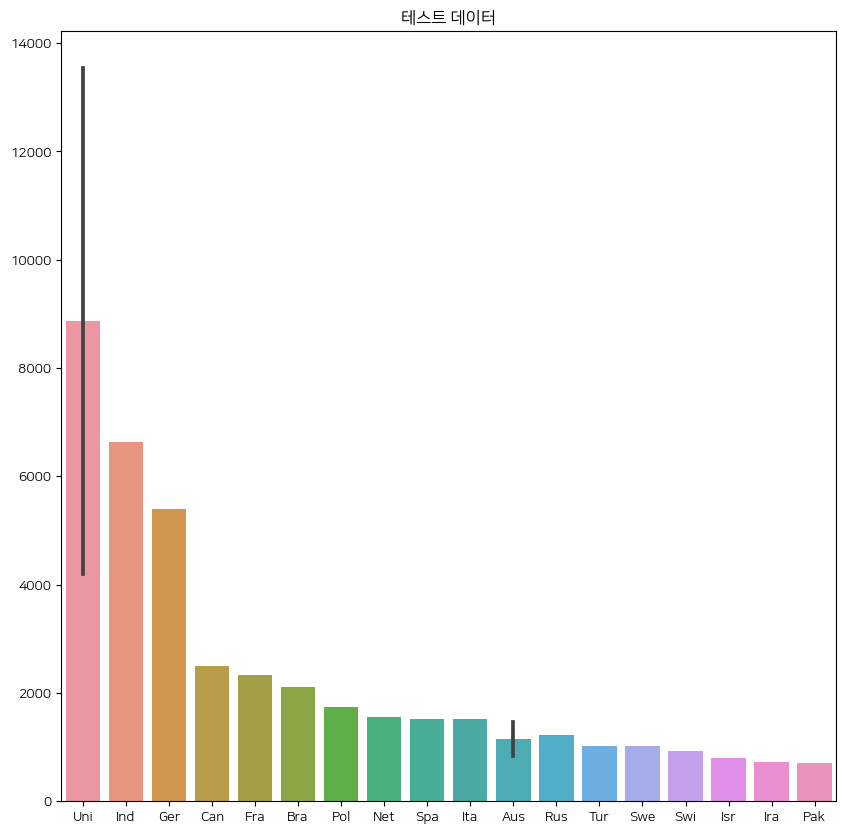

In [60]:
plt.figure(figsize=(10,10))
plt.title("테스트 데이터")
sns.barplot(survey_df , x = [ k[:3] for k in survey_df["Country"].value_counts().head(20).index], y = survey_df["Country"].value_counts().head(20).values)
#sns.barplot(survey_df , x = survey_df["Country"].value_counts().head(20).index, y = survey_df["Country"].value_counts().head(20).values)
plt.show()

In [61]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# DevType 
복수의 답변
종류가 10000 가지수면 어떻게 처리를 해야하나?

In [62]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

최소한의 단위로 쪼개어 유의미한 값을 가져와보자 

DevType column을 제일 작은 단위의 응답 항목으로 나누어 Dataframe 형태로 만들어보도록 하자
- Series를 인자로 받아온다
- value의 구분자는 ';'이다
- Series는 item()메서드를 사용하여 루프할 수 있습니다.
- 반환 값으로 각 제일 작은 단위의 응답항목을 column으로 갖는 DataFrame을 준다.
- 응답자가 제일 작은 단위의 기술 스택을 선택한 경우 해당 열의 값을 True로 아닌 False로 합니다.

In [63]:
# def split_multicolumn(ser : pd.Series) -> pd.DataFrame:
#     ser.str.contains(";", na=False)
#     #column_list = list(set([str(x).split(';') for x in ser.items()]))
#     new_columns = ser.str.split(r'(?:,|;)\s*')
#     #new_columns = str(set(ser.values)).split(";")
#     # DataFrame.at은 indexer인데 이거 사용하면 더 잘나온다 
#     df = pd.DataFrame(ser, index =ser.index ,columns=new_columns)
# #     return df 
# # split_multicolumn(survey_df.DevType)

# def split_multicolumn(ser: pd.Series) -> pd.DataFrame:
#     #Series.to_frame(name = _NoDefault)
#     result_df = pd.DataFrame(ser.values, index=ser.index, columns=["DevType"])
#     options =[]

#     for idx, value in ser[ser.notnull()].items():
#         for option in value.split(";"):
#             if option not in result_df.columns:
#                 options.append(option)
#                 result_df[option] = False
#                 result_df.at[idx, option] = True
#                 #result_df.loc[idx, option] = True
#     return result_df[options]


In [64]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# 바로 밑 함수 코드 다시보기

In [113]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [120]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

In [ ]:
dev_type_percentage = dev_type_totals/dev_type_totals.sum()*100
dev_type_percentage

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

In [ ]:
dev_type_percentage = dev_type_totals.apply(lambda x: x/dev_type_totals.sum()*100)
dev_type_percentage

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

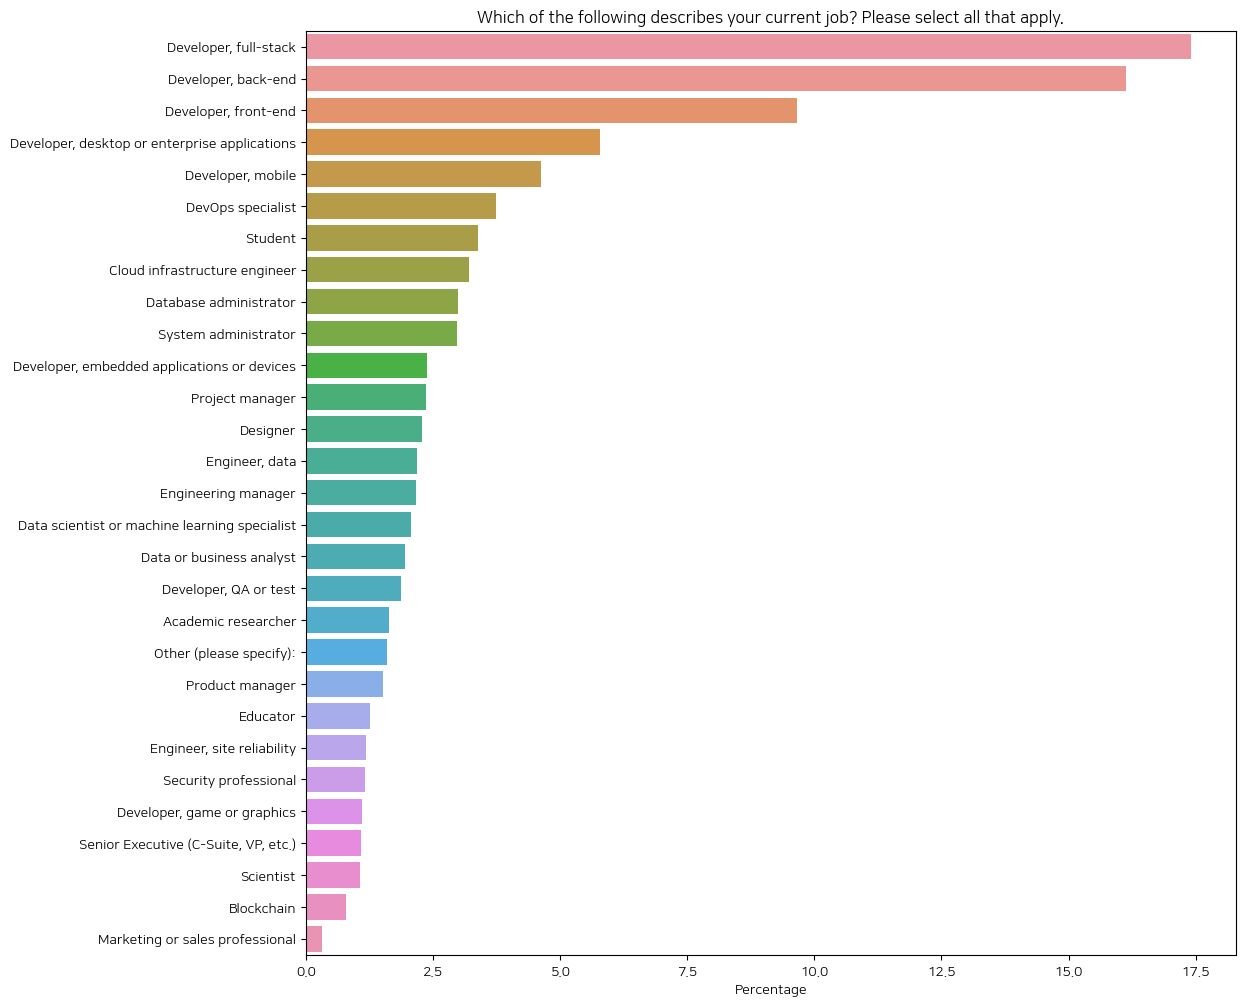

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=dev_type_percentage.values, y = dev_type_percentage.index)
plt.title(schema_raw["DevType"])
plt.ylabel(None);
plt.xlabel("Percentage")
plt.show()

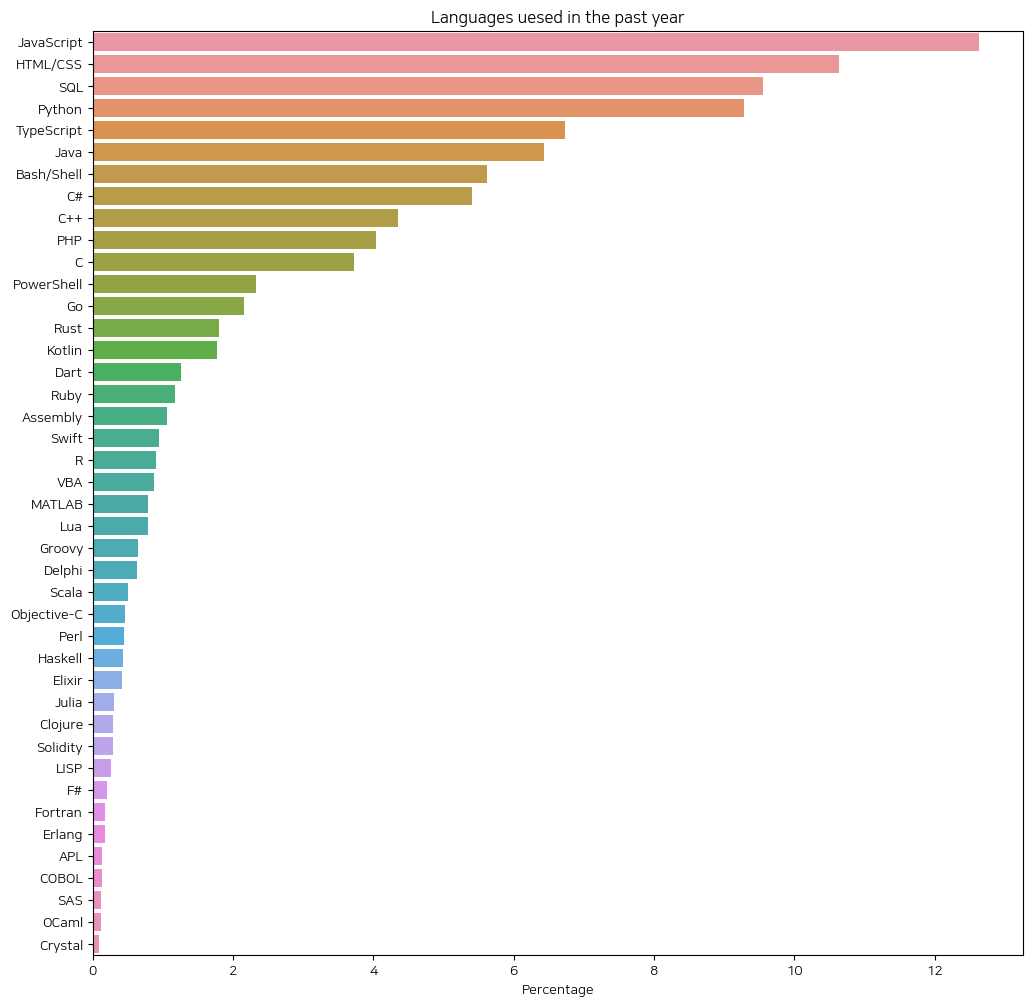

In [72]:
language_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
language_totals = language_df.sum().sort_values(ascending=False)

language_percentage = language_totals.apply(lambda x: x/language_totals.sum()*100)
plt.figure(figsize=(12,12))
sns.barplot(x=language_percentage.values, y = language_percentage.index)
plt.ylabel(None);
plt.xlabel("Percentage")
plt.title("Languages uesed in the past year")
plt.show()

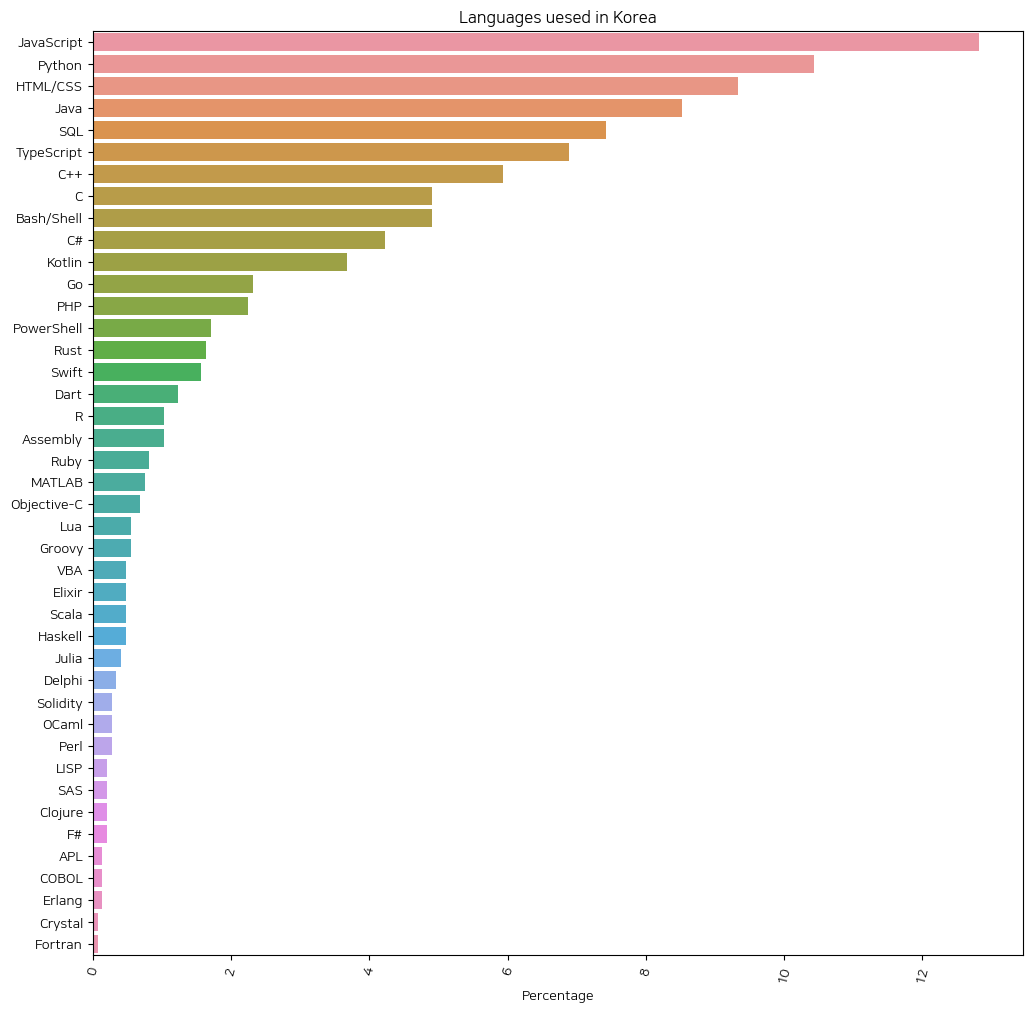

In [101]:
language_totals = language_df.sum().sort_values(ascending=False)

home_country = survey_df[(survey_df["Country"]=='South Korea')|(survey_df["Country"] == 'Republic of Korea')]
home_worked = split_multicolumn(home_country.LanguageHaveWorkedWith)

home_worked_totals = home_worked.sum().sort_values(ascending=False)
home_worked_percentage = home_worked_totals.apply(lambda x: x/home_worked_totals.sum()*100)

plt.figure(figsize=(12,12))
sns.barplot(x=home_worked_percentage.values, y = home_worked_percentage.index)
plt.ylabel(None);
plt.xticks(rotation = 75)
plt.xlabel("Percentage")
plt.title("Languages uesed in Korea")
plt.show()

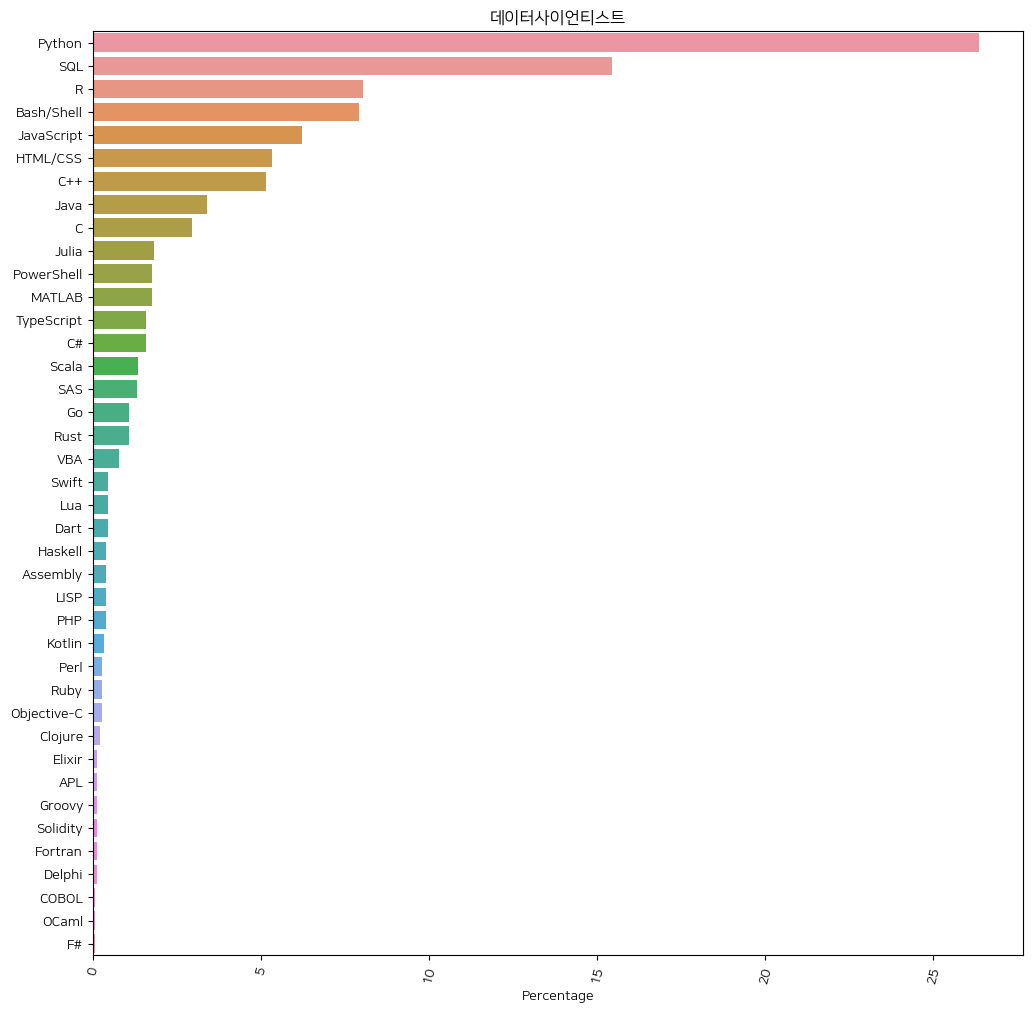

In [110]:

data_scientist = survey_df[(survey_df["DevType"]=='Data scientist or machine learning specialist')]
data_scientist = split_multicolumn(data_scientist.LanguageHaveWorkedWith)

data_scientist_total = data_scientist.sum().sort_values(ascending=False)
data_scientist_percentage = data_scientist_total.apply(lambda x: x/data_scientist_total.sum()*100)

plt.figure(figsize=(12,12))
sns.barplot(x=data_scientist_percentage.values, y = data_scientist_percentage.index)
plt.ylabel(None);
plt.xticks(rotation = 75)
plt.xlabel("Percentage")
plt.title("데이터사이언티스트")
plt.show()

In [111]:
#data_scientist = survey_df[(survey_df["DevType"]=='Data Scientist')|(survey_df["Country"] == 'machine learning specialist')]
survey_df["DevType"].nunique

<bound method IndexOpsMixin.nunique of ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object>

In [121]:
langauge_want_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
langauge_want_df

,Rust,TypeScript,C#,C++,HTML/CSS,JavaScript,SQL,Elixir,F#,Go,...,Assembly,Solidity,R,Crystal,Objective-C,SAS,OCaml,MATLAB,Fortran,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: title={'center': '내년에 많이 배우고 싶은 언어는?'}>

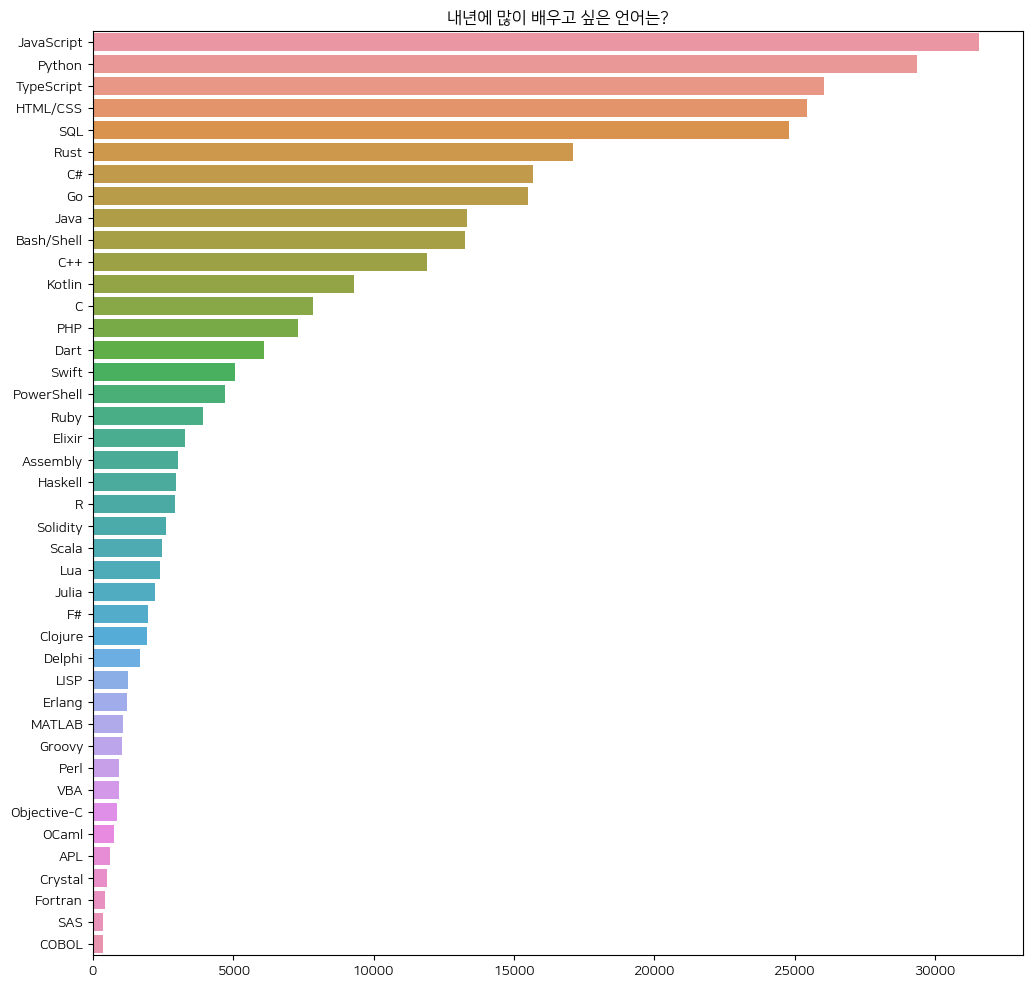

In [124]:
langauge_want_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
langauge_want_total = langauge_want_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.title("내년에 많이 배우고 싶은 언어는?")
sns.barplot(x = langauge_want_total.values, y = langauge_want_total.index)

In [127]:
survey_raw_df.DatabaseHaveWorkedWith

ResponseId
1                                                      NaN
2                                                      NaN
3                                     Microsoft SQL Server
4                                     Microsoft SQL Server
5        Cloud Firestore;Elasticsearch;Microsoft SQL Se...
                               ...                        
73264                 Elasticsearch;MySQL;PostgreSQL;Redis
73265                  Elasticsearch;MongoDB;Oracle;SQLite
73266    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...
73267                  Microsoft SQL Server;MongoDB;Oracle
73268                     Microsoft SQL Server;Neo4j;Redis
Name: DatabaseHaveWorkedWith, Length: 73268, dtype: object

In [129]:
database_work_df  = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
database_work_df

,Microsoft SQL Server,Cloud Firestore,Elasticsearch,Firebase Realtime Database,MongoDB,MySQL,Couchbase,CouchDB,PostgreSQL,Redis,DynamoDB,Neo4j,SQLite,Cassandra,MariaDB,Oracle,IBM DB2
ResponseId,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False
73265,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False
73266,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False


<AxesSubplot: title={'center': '데이터베이스에서 가장 많이 사용되는 언어는 무엇입니까'}>

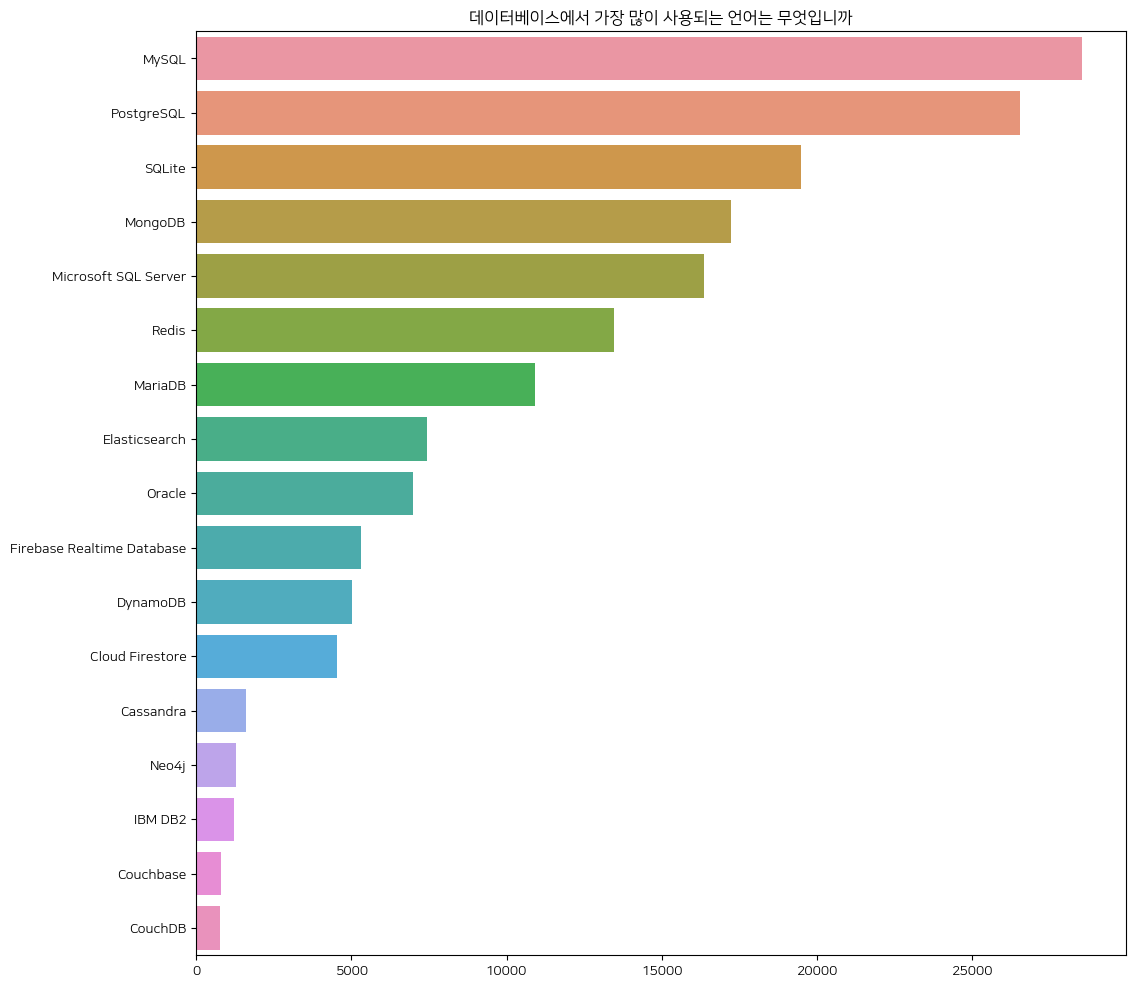

In [131]:
database_work_df = database_work_df.sum().sort_values(ascending=False)
plt.figure(figsize = (12,12))
plt.title("데이터베이스에서 가장 많이 사용되는 언어는 무엇입니까")
sns.barplot(x = database_work_df.values, y = database_work_df.index)
